# Dados e Aprendizagem Automática
### Part VII

Install ipywidgets and shap

### Imports and installations

In [1]:

import sklearn as skl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import shap

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import  train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance

/Users/gugafm11/miniconda3/envs/daa/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## FE and EDA on Titanic Dataset

Load the CSV - *Titanic*

In [2]:
df = pd.read_csv("datasets/titanic.csv")

Inspect data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


Plot the distribution of *Age*, *SibSp*, *Parch*, and *Fare*

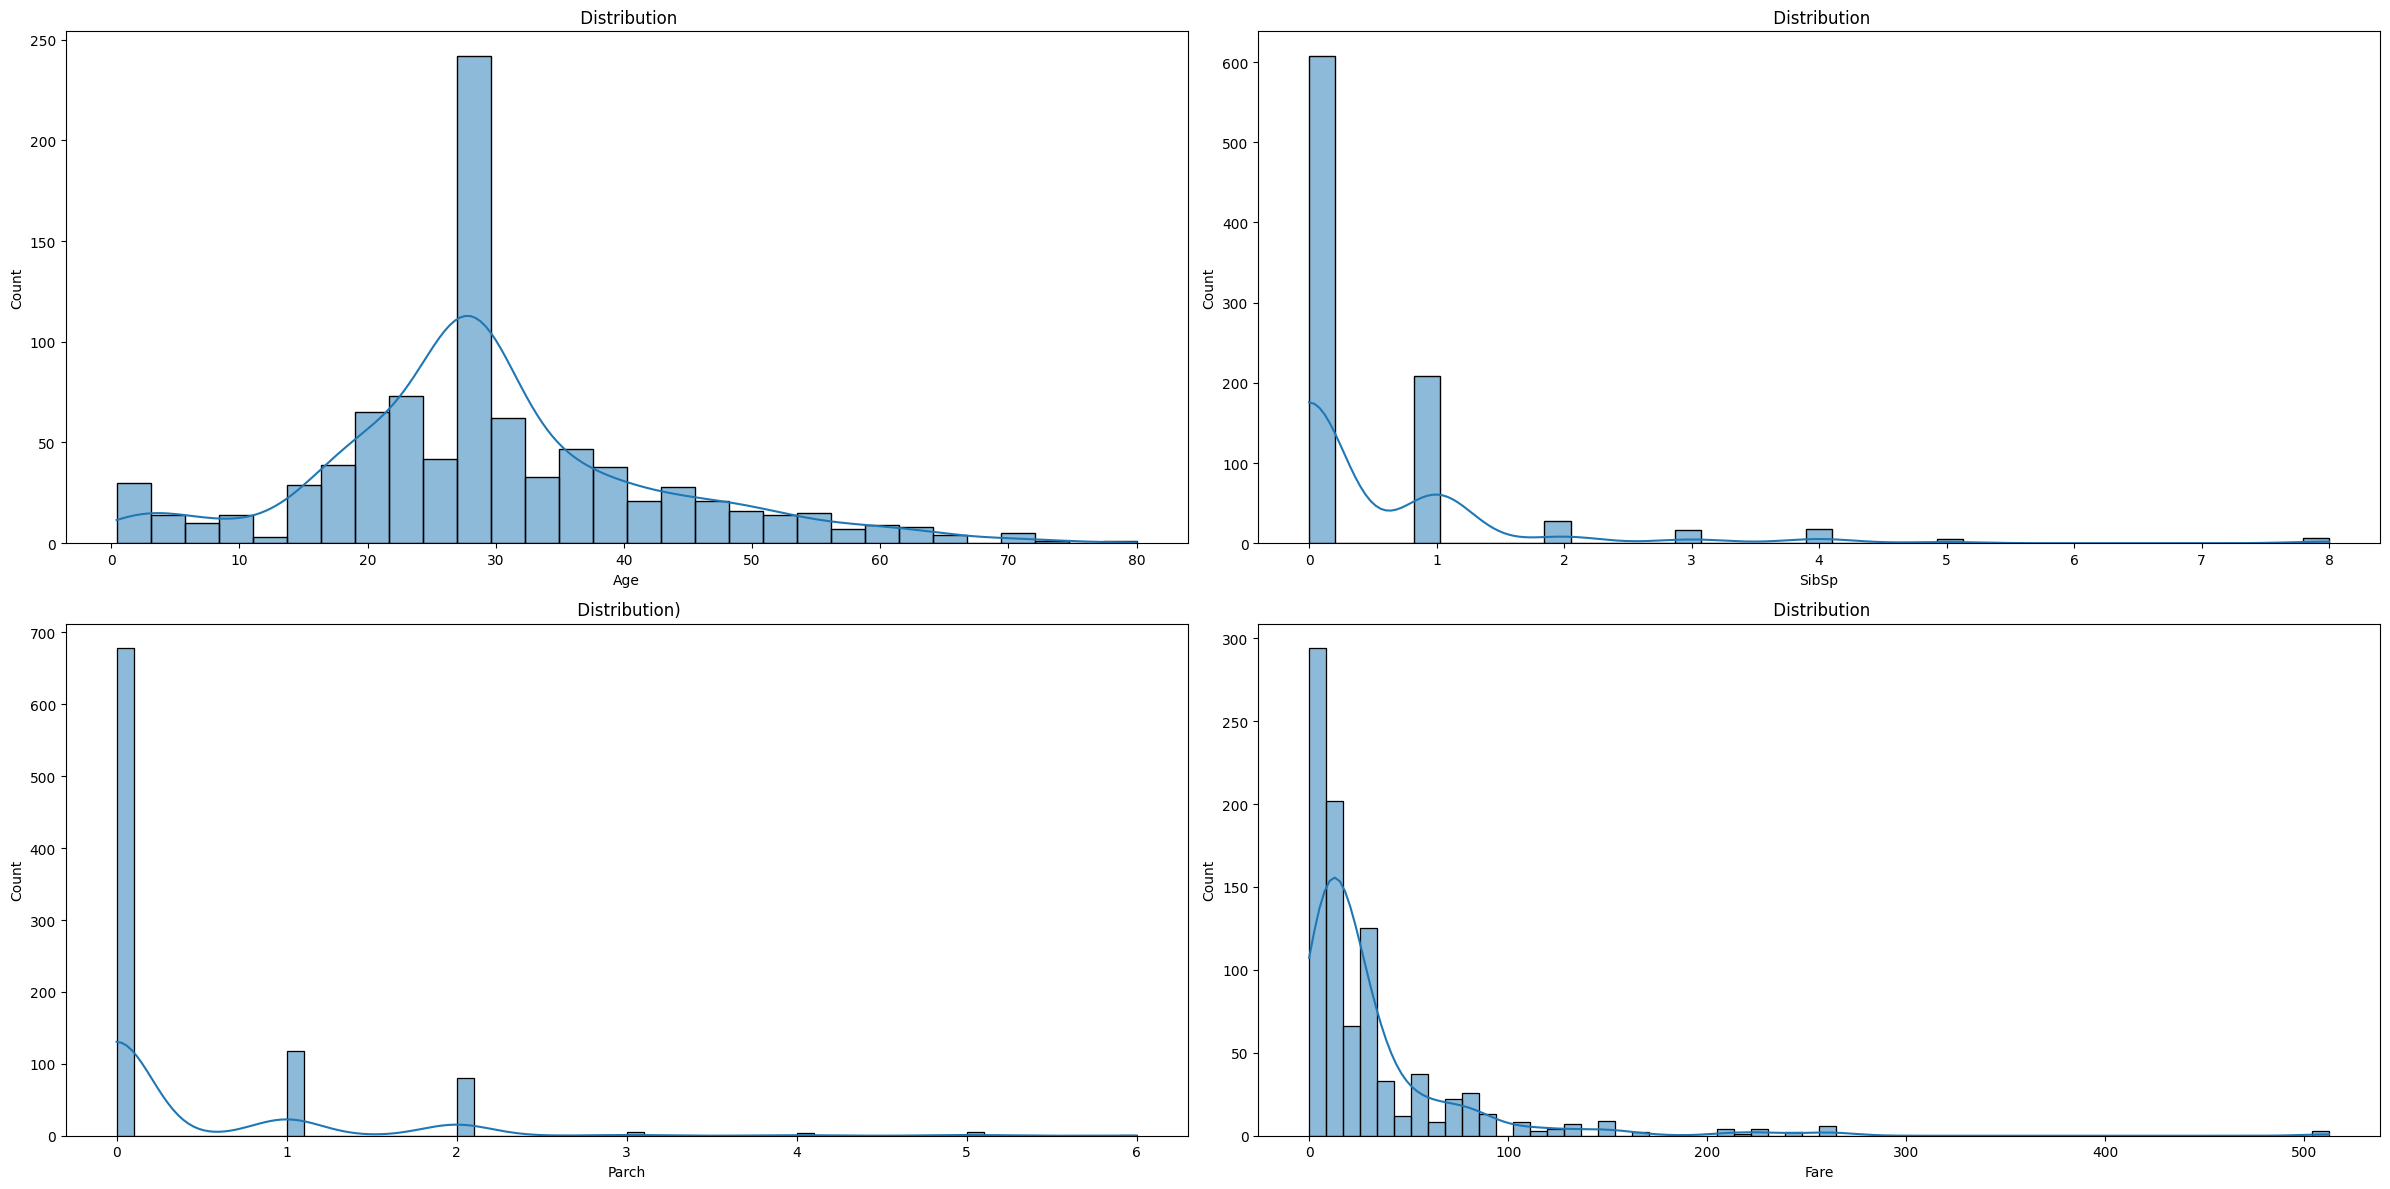

In [4]:
# Set up the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(24, 12))

# Age Distribution
sns.histplot(data=df, x='Age', kde=True, ax=axes[0, 0])
axes[0, 0].set_title(' Distribution')

# SibSp Distribution
sns.histplot(data=df, x='SibSp', kde=True, ax=axes[0, 1])
axes[0, 1].set_title(' Distribution')

# Parch Distribution
sns.histplot(data=df, x='Parch', kde=True, ax=axes[1, 0])
axes[1, 0].set_title(' Distribution)')

# Fare Distribution
sns.histplot(data=df, x='Fare', kde=True, ax=axes[1, 1])
axes[1, 1].set_title(' Distribution')

plt.tight_layout()
plt.show()

In [5]:
df2 = df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis = 1)
correlation_matrix = df2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

KeyError: "['Name', 'Ticket', 'Cabin'] not found in axis"

Missing values

<Axes: >

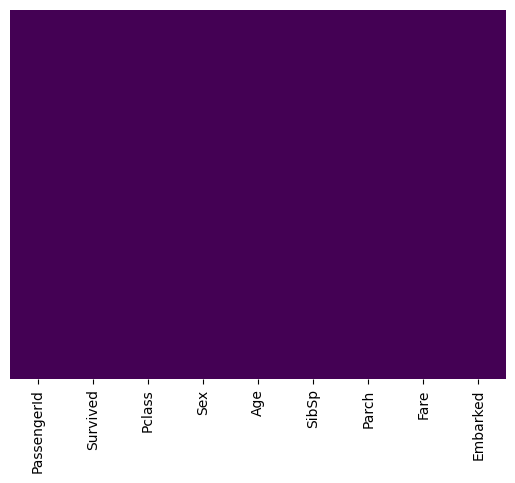

In [ ]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Feature *Age*

In [ ]:
def med_impute_nan(df):
    med_impute = df.copy()
    med_impute['Age'] = med_impute['Age'].fillna(med_impute['Age'].median())
    return med_impute

In [ ]:
med_impute = med_impute_nan(df)
med_impute.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
med_impute.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


In [ ]:
# checking standard deviation
print(df['Age'].std())
print(med_impute['Age'].std())


13.019696550973201
13.019696550973201


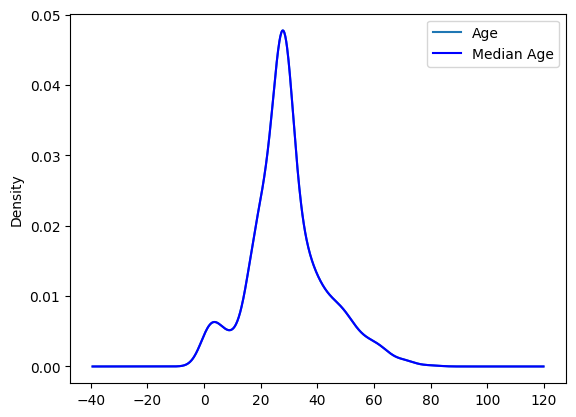

In [ ]:
# plotting the variance difference
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
med_impute['Age'].plot(kind='kde', label='Median Age', ax=ax, color='blue')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [ ]:
df = med_impute
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Feature *Embarked*

In [ ]:
df.Embarked.value_counts()

Embarked
2    646
0    168
1     77
Name: count, dtype: int64

In [ ]:
emabark = df['Embarked'].dropna()

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [ ]:
df['Embarked'].mode()

0    2
Name: Embarked, dtype: int64

In [ ]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [ ]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked


In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Feature *Cabin*

In [ ]:
df['Cabin'].value_counts()

KeyError: 'Cabin'

In [ ]:
df['Cabin'].mode()

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [ ]:
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


Feature *Sex* 

In [ ]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,B96 B98,S


Features *Name*, *Ticket* and *Cabin* 

In [ ]:
df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


Feature *Embarked* 

In [ ]:
print(df["Embarked"].value_counts())

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64


In [ ]:
cols = ['Embarked']

le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


Correlation analysis of the features:

In [ ]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['Survived'].sort_values(ascending=False)
print("Correlation with target (Survived):\n", correlation_with_target)

Correlation with target (Survived):
 Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Embarked      -0.167675
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64


Save dataset into a new file

In [ ]:
# Convert data to DataFrame
t = pd.DataFrame(df)

# Specify the CSV file name
filename = "datasets/titanic.csv"

# Save to CSV
t.to_csv(filename, index=False, encoding='utf-8')

## Random Forest Classifier

Data split

In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2022)

Train the model

In [ ]:
rf_model = RandomForestClassifier(random_state=2022)

In [ ]:
type(rf_model)

abc.ABCMeta

In [ ]:
rf_model.fit(X_train,y_train)

AttributeError: 'DataFrame' object has no attribute '_validate_params'

Accuracy of the model

In [ ]:
rf_score = rf_model.score()
print("Accuracy: %.2f%%" % (rf_score * 100))

Save predictions to a file

In [ ]:
op_rf = rf_model.predict()

In [ ]:
op = pd.DataFrame(X_test['PassengerId'])
op['Survived'] = op_rf
op.to_csv("submission.csv", index=False)

## Feature Importance

Understanding which features influence predictions is fundamental. Feature importance analysis reveals the impact of factors like age, gender, and class on survival rates in theTitanic dataset.

### Random Forest Importance

In [ ]:
start_time = time.time()

rf_importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)

elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

In [ ]:
print("Random Forest Feature Importances:\n", rf_importances)

### FI based on Mean Decrease in Impurity (MDI)

Feature importances are provided by the fitted attribute feature_importances_ and they are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree.

In [ ]:
start_time = time.time()

mdi_importances = pd.Series(rf_model.feature_importances_, index=X_test.columns)

elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

In [ ]:
print("Feature importances using MDI:\n", )

In [ ]:
fig, ax = plt.subplots()
mdi_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### FI based on Permutation Importance

Permutation feature importance overcomes limitations of the impurity-based feature importance: they do not have a bias toward high-cardinality features and can be computed on a left-out test set.

In [ ]:
start_time = time.time()

result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

In [ ]:
p_importances = pd.Series(result.importances_mean, index=X_test.columns)
print("Feature importances using PI:\n", p_importances)

In [ ]:
fig, ax = plt.subplots()
p_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using PI")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

### Which features have more importance?

Model specific vs. model agnostic

## SHAP (SHapley Additive exPlanations) Analysis

<code>pip install shap</code>

<code>conda install -c conda-forge shap</code>

In [ ]:
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer()
shap_values = explainer(X_test)

### Local Interpretability

Local interpretability can be explained using the Titanic dataset. Let’s understand why a specific passenger, *ID=0*, didn't survived.

In [ ]:
no = 0 # change the number for a different passenger analysis
if rf_model.predict(np.expand_dims(X_test.iloc[no],axis=0))[0] == 1:
    print("The passenger survived")
else:
    print("The passenger did not survive")
shap.plots.waterfall(shap_values[no,:,1])

### Global Interpretability

In [ ]:
shap.plots.heatmap(shap_values[:,:,1])

### SHAP Analysis - Feature wise

This tells us how each feature globally contributed to the model prediction.

**Sex**

In [ ]:
shap.plots.scatter(shap_values[:,"Sex",1])

**Pclass**

In [ ]:
shap.plots.scatter(shap_values[:,"Pclass",1])

**Age**

In [ ]:
shap.plots.scatter(shap_values[:,"Age",1])

**Fare**

In [ ]:
shap.plots.scatter(shap_values[:,"Fare",1])

**SibSp** and **Parch**

In [ ]:
shap.plots.scatter(shap_values[:,"SibSp",1])

In [ ]:
shap.plots.scatter(shap_values[:,"Parch",1])

**Global interpretability** is vital for comprehending overall model behavior. Using **Partial Dependence Plots (PDPs)** with the Titanic dataset, we can visualize how changes in *SibSp* influence the model’s predictions.

In [ ]:
shap.partial_dependence_plot("SibSp", rf_model.predict, X_train, ice=False, model_expected_value=True, feature_expected_value=True,)

## Linear Regression

In [ ]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)

In [ ]:
explainer = shap.LinearExplainer(lm, X_train, feature_perturbation="interventional")
shap_values = explainer.shap_values(X_train)

In [ ]:
shap.partial_dependence_plot("SibSp", lm.predict, X_train, ice=False, 
                             model_expected_value=True, feature_expected_value=True,)

For one passenger:

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

For all training data set:

In [ ]:
explainer_shap = shap.LinearExplainer(model=lm, masker=X_train)
shap_values = explainer_shap.shap_values(X_train)

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

In [ ]:
shap.dependence_plot("SibSp", shap_values, X_train)

In [ ]:
shap.partial_dependence_plot("SibSp", lm.predict, X_train, ice=False,model_expected_value=True, feature_expected_value=True,)